

## Final Report Project: "Arc Diagrams"

<div class="alert alert-block alert-danger">

**IMPORTANT**: 
Start by filling in your 9 digit *student ID number* in the orange box below. **DO IT NOW**. 
    


Please check very carefully that your *student ID number* is accurately typed everywhere. Otherwise your marks might go to the wrong person.

Use the available cells to introduce the code. You can add additional cells if needed. Explain your code as much as possible with `# comments` </div>

<div class="alert alert-block alert-warning">

### ID: please replace the text after the colon by your 9 digit student ID number

<br /></div>



### Instructions:

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. 

Your code must be **well documented**. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation).

The total number of marks available is 100. Attempt all parts of all questions.

For this project, you are expected to write your code almost entirely 'from scratch', although you are allowed to use some specific packages like `numpy`, `matplotlib.pyplot`, etc. There will be more information about the admissible module imports below.





### Marking of projects:

The first thing we will do to evaluate your submission is to clear all outputs and run the entire notebook from the beginning to the end. It is your responsibility to ensure that the code produces **no errors**. You will automatically receive **zero marks for any exercises where the code cell raises an error**. If you run into an error and do not know how to fix it, comment out the critical line of code and any subsequent ones that depend on it. Add a remark indicating that you are aware of the problem and potential reasons.

If you do not know how to implement a certain operation in Python, add a comment and explain in plain English (and in sufficient detail) what you would like to do. You may receive partial credit for expedient ideas formulated in this way.

As explained in more detail below, roughly **50 % of the marks** for each coding exercise will be awarded for **comments and documentation**. 

There will also be several exercises asking you to analyze, explain and interpret results. When writing up projects, good writing style is even more important than in written exams. 

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**


<div class="alert alert-block alert-danger">
    
### Plagiarism warning:

Your work will be tested for plagiarism. In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the plagiarism detection software "Turnitin" to help us assess how much of the submitted work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work once accordingly before finalising your submission.


However, you must use your own words as far as possible (within reason, e.g. you would not be expected to change the wording of a well-known theorem), and you **must** [reference] any sources that you use. You cannot communicate with other students on any part of the project. You should also note that some of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).

</div>

---
### Introduction to the project

In this project you will investigate properties of _arc diagrams_, particularly so-called _crossings_ and _nestings_. 

#### Arc diagrams

Assume you have an even number of points on a line, and denote the number of points by $2n$ with $n\in\mathbb N_0$. As there is an even number of points, one can connect these points in pairs; this is called a **matching**. We will label the points by $0,1,\ldots,2n-1$ from left to right.

A nice way of visualising such a matching is via an **arc diagram**, where any matched points are connected by an arc, as in the following image.

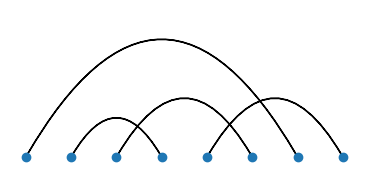

In this example we have eight points giving rise to four arcs. We will draw all these arcs above the line on which the points are situated.

Parts of this project will involve counting all the different possibilities of drawing arc diagrams with $n$ arcs, so let's do some easy counting arguments to get you started:

If you have $2n$ points then pick the left-most point. The arc starting at this point can be connected to any of the remaining $2n-1$ points. Once you have done this, there are $2(n-1)$ points left to connect. Repeating this process, you can see that the left-most of these points can be connected to any of $2(n-1)-1$ points, and so forth. In other words, the total number of arc diagrams with $n$ arcs is 
$$(2n-1)\cdot(2n-3)\cdot\ldots3\cdot1\;,$$ which is usually written as $(2n-1)!!$ using the [double factorial](https://en.wikipedia.org/wiki/Double_factorial).

If you like, you can turn the above argument into a proof by mathematical induction: There is precisely one way of connecting zero points (base case $n=0$), and if there are $(2n-1)!!$ arc diagrams on $2n$ points (inductive assumption), then we can add another arc by adding a point to the left and inserting another point in any of $2n+1$ places, giving rise to $(2n+1)\cdot(2n-1)!!=(2n+1)!!$ arc diagrams on $2(n+1)$ points (inductive step).

#### Some notation

It will be convenient to denote an arc starting at position $i$ and ending at position $j$ (with $j>i$) by the ordered pair $(i,j)$.

In the above example, we have a set of four arcs $\{(0,6),(1,3),(2,5),(4,7)\}$.

#### Crossings

It is easy to see that arcs can cross each other. Two arcs $(i,j)$ and $(k,l)$ are said to be **crossing** if and only if $$i<k<j<l\quad\text{or}\quad k<i<l<j\;.$$

In the above example, there are three crossings. The two arcs $(1,3)$ and $(2,5)$ cross, as do the arcs $(2,5)$ and $(4,7)$ and the arcs $(0,6)$ and $4,7)$.


#### Nestings

It is also clear that an arc can be entirely inside another arc, which we call a nesting. Two arcs $(i,j)$ and $(k,l)$ are **nested** if and only if $$i<k<l<j\quad\text{or}\quad k<i<j<l\;.$$

In the above example, there are two nestings. The two arcs $(0,6)$ and $(1,3)$ are nested, as are the arcs $(0,6)$ and $(2,5)$.


#### An example

Consider $n=2$. By the above counting argument, we have three possible matchings. These are


| 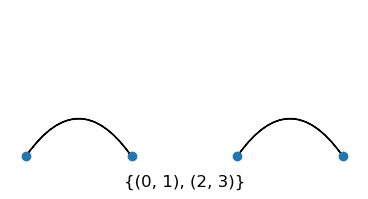 | 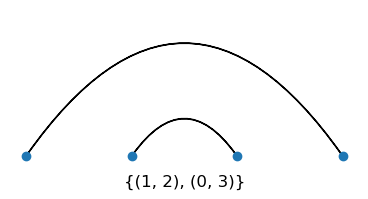 | 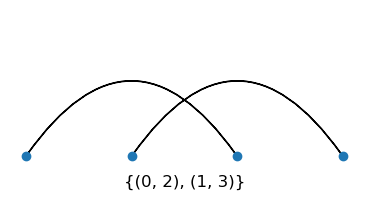 |
| :---: | :---: | :---: |
|0 nestings, 0 crossings | 1 nesting, 0 crossings | 0 nestings, 1 crossing |

We can see that the arcs $(0,3)$ and $(1,2)$ are nested, whereas the arcs $(0,2)$ and $(1,3)$ are crossed.

---
### Plotting arc diagrams

The following code provides you with an easy way to draw arc diagrams. To store an arc diagram, we adapt the above mathematical notation and use a list of ordered pairs of integers as our data structure. For every arc $(i,j)$, we then draw a curved line connecting the two points with coordinates $(i,0)$ and $(j,0)$ in the $xy$-plane.

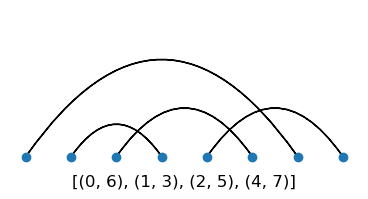

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_arc_diagram(arcs,title=True):
    """
    Draw an arc diagram specified by a list of ordered pairs of matching points.

    Parameters
    ----------
    - arcs : list of tuples (i, j)
        the list/set of matching pairs of points, expected in canonical order (i < j)
        and such that every integer 0, 1, ..., 2*len(arcs) - 1 occurs
        exactly once
    - title : bool
        whether or not the set of arcs should be displayed as a text, too

    Returns
    -------
    - None
    """
    plt.figure(figsize=(4.5,2)) # pick appropriate figure size
    plt.plot([0 for _ in range(2*len(arcs))],"o") # draw 2n points for n arcs
    for arc in arcs:
        plt.gca().add_patch(patches.FancyArrowPatch((arc[0],0),(arc[1],0),connectionstyle="angle3,angleA=55,angleB=-55")) # draw a connecting line from arc[0] to arc[1]
    plt.gca().axis("off") # remove the axis
    if title: plt.title(arcs,y=-0.2) # display the argument below the image
    plt.show()
    
draw_arc_diagram([(0,6),(1,3),(2,5),(4,7)])

Any mistake you make in setting up a diagram will show up in an obvious way when drawing the diagram with this function, as in the code box below. We encourage you to use this function frequently when testing your code for errors, it will be quite helpful.

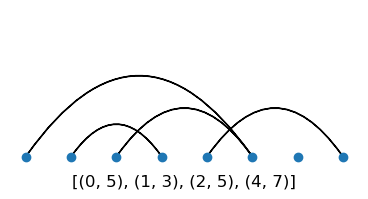

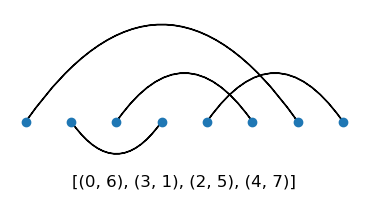

In [2]:
draw_arc_diagram([(0,5),(1,3),(2,5),(4,7)]) # duplicate point
draw_arc_diagram([(0,6),(3,1),(2,5),(4,7)]) # wrong order

---
### The structure of the project

This project consists of **3 parts**. Each part consists of several exercises, which will ask you to analyze code, write and run your own code, and/or explain and interpret your results. Recall that all code needs to be properly documented with `# comments`, and the explanations in these comments will be assessed. Typically, about 50 % of the marks will be awarded for adequate documentation. 

* The **first part** (worth 45 marks) asks you to explain given Python code for arc diagrams, fix errors, and perform (theoretical and numerical) algorithm analysis.

* The **second part** (worth 30 marks) asks you to write code yourself to count certain types of arc diagrams.

* The **third part** (worth 25 marks) asks you to consider the "rewiring" of arc diagrams subject to certain constraints.


The following code box imports all necessary modules. Run it now to set up your environment (and remember to re-run it whenever the kernel is restarted).

**You may not import any other modules, except for the `project` module, which will be introduced in Part 3.**

In [3]:
#DO NOT CHANGE THE CONTENT OF THIS CODE BOX
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from timeit import timeit
import seaborn as sns
from itertools import permutations

# Part 1: Analysis of given code  [45 marks total]

***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. The mark scheme is provided with each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you must cite them in the `# comments`.
</div>

When we asked **ChatGPT 3.5** to "write Python code to count the number of crossings and nestings of an arc diagram on 2n points labelled by 0 to 2n-1 on the line" (we had to add the labelling instruction to get the indexing right), it produced the following answer.


> Sure, an arc diagram represents pairwise relationships between points. Here's a Python code snippet using a simple approach to count the number of crossings and nestings in an arc diagram on 2n points:
> 
> ```python
> def count_crossings_and_nestings(arcs):
>     n = len(arcs) // 2
>     crossings = 0
>     nestings = 0
> 
>     for i in range(2 * n):
>         for j in range(i + 1, 2 * n):
>             if arcs[i][0] < arcs[j][0] < arcs[i][1] < arcs[j][1]:
>                 crossings += 1
>             elif arcs[i][0] > arcs[j][0] > arcs[i][1] > arcs[j][1]:
>                 crossings += 1
>             elif arcs[i][0] < arcs[j][0] < arcs[j][1] < arcs[i][1]:
>                 nestings += 1
>             elif arcs[i][0] > arcs[j][0] > arcs[i][1] > arcs[j][1]:
>                 nestings += 1
> 
>     return crossings, nestings
> 
> # Example usage:
> n = 4  # You can change this to the desired number of points (2n points)
> arcs = [(0, 3), (1, 2), (4, 7), (5, 6), (8, 11), (9, 10), (12, 15), (13, 14)]
> crossings, nestings = count_crossings_and_nestings(arcs)
> 
> print(f"Number of crossings: {crossings}")
> print(f"Number of nestings: {nestings}")
> ```
> <br>
> 
> This code defines a function `count_crossings_and_nestings` that takes a list of arcs as input, where each arc is represented as a tuple (start, end). The function then iterates through all pairs of arcs and checks for crossings and nestings based on their start and end points. The example usage shows how to use the function with a sample set of arcs.
> 
> You can modify the `arcs` variable with your specific arc diagram data for testing.
> 

---
**[1.1] [15 marks]** Analyze the ChatGPT output by answering the following 9 questions.

**Data types**

1. Which data types would be accepted by the function `count_crossings_and_nestings` for the argument `arcs`? Would a set work?

*(Type your answer in this Markdown cell)*

2. What does the function return? What data type is it?

*(Type your answer in this Markdown cell)*

**Test cases**

3. Run the example suggested by ChatGPT. Is the function ``count_crossings_and_nestings`` working as expected?

In [4]:
# Type your code and comments here

4. Try computing nestings and crossings with the smallest examples $\{\}$, $\{(0,1)\}$, $\{(0,1),(2,3)\}$, $\{(0,3),(1,2)\}$ and $\{(0,2),(1,3)\}$. Does the output work?

In [5]:
# Type your code and comments here

5. For diagrams with three arcs, there are 15 possibilities. Find one for which the function `count_crossings_and_nestings` provides a wrong result. Print the result and draw the corresponding diagram.

In [6]:
# Type your code and comments here

**First problem**

6. The first problem is related to the variable `n` and its value. Explain what goes wrong.

*(Type your answer in this Markdown cell)*

7. Provide a better implementation of the function, avoiding the use of `n`. Use the same function name, i.e., ``count_crossings_and_nestings``.

In [7]:
# Type your code and comments here

**Second problem**

8. Run your improved function on $\{(1,4),(0,6),(3,5),(2,9),(7,8)\}$. Is the output what you expect?

In [8]:
# Type your code and comments here

9. Find the problem and fix it, writing a correct version of the function. Again, use the same function name, i.e., ``count_crossings_and_nestings``. Demonstrate that the new version works by testing it on the example from _Question 8_ above.

In [9]:
# Type your code and comments here

---
**[1.2] [5 marks]** Now write a well-documented version of your function `count_crossings_and_nestings`. Add a document string and plenty of comments.

In [10]:
# Type your code and comments here

---
**[1.3] [5 marks]** What can you say about the computational complexity of `count_crossings_and_nestings`? Discuss how run time and memory requirement grow as the number $n$ of arcs increases. Give reasons.

*(Type your answer in this Markdown cell)*

---
**[1.4] [5 marks]**  The `numpy` module contains functions to generate random permutations. Given a non-negative integer $n$, every permutation of $2n$ numbers can be turned into a matching by taking the first half of the permutation entries (i.e., the first $n$ numbers) and connecting each of them to the corresponding entry in the second half (i.e., the last $n$ numbers). Use this method to write a function `random_matching` that takes $n$ and returns a randomly selected matching of $2n$ numbers in the form of a list of $n$ tuples, where each tuple contains two integers. 

Note: Ensure that the tuples are returned such that the first integer is less than the second integer.

To demonstrate that your code works, draw the arc diagrams for five randomly chosen matchings of $20$ numbers.

In [11]:
# Type your code and comments here

---
**[1.5] [5 marks]**  The module`timeit` (imported above) allows you to compute the time a function call takes. Verify your answer about the time complexity from _Exercise [1.3]_ by computing the run time for randomly chosen arc diagrams of suitable sizes and producing an appropriate plot of the average run times against the lengths of the matchings.

Interpret your results.

In [12]:
# Type your code and comments here

*(Type your interpretation in this Markdown cell)*

---
**[1.6] [5 marks]**  Now that you understand the code well, here is an alternative function written by some crazy Python programmer who loves to write one-line lambda functions.
```python
countcrossnest = lambda arcs: tuple(map(sum,zip(*([(False,False)]+[(i<k<j<l or k<i<l<j,i<k<l<j or k<i<j<l) for _,(i,j) in enumerate(arcs) for k,l in arcs[_+1:]]))))
```
Note: You should use this correctly working one-line function to verify your work from _Exercise [1.1]_. If there is a mismatch, go back!

1. Explain what is computed in `[(i<k<j<l or k<i<l<j,i<k<l<j or k<i<j<l) for _,(i,j) in enumerate(arcs) for k,l in arcs[_+1:]]`.

*(Type your answer in this Markdown cell)*

2. Explain why `tuple(map(sum,zip(* ... )))` returns the number of crossings and nestings.

*(Type your answer in this Markdown cell)*

3. What is the purpose of writing `[(False,False)]+`? Could one not simply omit this?

*(Type your answer in this Markdown cell)*

---
**[1.7] [5 marks]**  Compare the time complexity of `count_crossings_and_nestings` and `countcrossnest`, using appropriate testing parameters and a suitable visualization.


In [13]:
# Type your code and comments here

*(Type your interpretation in this Markdown cell)*


# Part 2: Count matchings with respect to crossings and nestings [30 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. The mark scheme is provided with each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you must cite them in the `# comments`.
</div>



<div class="alert alert-block alert-info">
    
To work on the following exercises, you will still need a (properly working) function `count_crossings_and_nestings` to count the crossings and nestings of a given matching. If you did not manage to write your own version in _Exercise [1.2]_ above, you can use the alternative from _Exercise [1.7]_ instead. In this case, uncomment the second line of the following code cell in order to define this function as `count_crossings_and_nestings`.
</div>


In [14]:
# Uncomment the following line if you did not manage to obtain a properly working `count_crossings_and_nestings()` function in Part 1.
#count_crossings_and_nestings = lambda arcs: tuple(map(sum,zip(*([(False,False)]+[(i<k<j<l or k<i<l<j,i<k<l<j or k<i<j<l) for _,(i,j) in enumerate(arcs) for k,l in arcs[_+1:]]))))

---
**[2.1] [10 marks]** The code in Part 1 counts the crossings and nestings for a given matching. We now want to use this to analyze the distribution of crossings and nestings for arc diagrams with $100$ arcs.

Using your function `random_matching` from _Exercise [1.4]_, generate $10^4$ such arc diagrams and create histograms for the numbers of crossings and nestings, respectively. Display them in a single plot. Also generate a two-dimensional histogram for the joint distribution of crossings and nestings.

What do you observe?

In [15]:
# Type your code and comments here

*(Type your observations in this Markdown cell)*

---
**[2.2] [10 marks]** 

In order to determine the full histogram for all matchings of a given size, we need to generate every single possible matching in a unique way. This is where the inductive description from the introduction becomes useful, as it provides a way to do so recursively:
We can generate all arc diagrams with $n$ arcs from all arc diagrams with $(n-1)$ arcs
by adding one arc to each of them in precisely $2n-1$ ways. To this end, we take an arc diagram with $(n-1)$ arcs, insert one new point at the left end and one more point somewhere to the right of it ($2n - 1$ options), and then match the newly inserted points to obtain the additional arc. The only "problem" is that we need to relabel some points in doing so.

Inserting a point to the left implies that the indices of the other points all have to be increased by one. Moreover, if we insert another point at some position $m$, then all the indices with values $m$ and larger again have to be increased by one.

For example, if we start with an arc diagram with precisely one arc, $\{(0,1)\}$, then inserting a point to the left gives this one index zero and increases the other indices, leading to
$\{(1,2),(0,\cdot)\}$ with $\cdot$ still to be inserted. We can now insert a second point at positions $m=1,2,3$. This implies that all indices with values $m$ and larger need to be increased. For $m=1$ this leads to $\{(2,3),(0,1)\}$, for $m=2$ we get $\{(1,3),(0,2)\}$, and finally for $m=3$ we find $\{(1,2),(0,3)\}$.   

Using this approach, write a function `get_all_matchings` that takes as argument a non-negative integer $n$ and returns a list of all $(2n-1)!!$ matchings on $n$ arcs.

You may do this recursively or iteratively.

Test your function by verifying that `len(get_all_matchings(n))` is equal to $(2n-1)!!$ for $n=0,1,\ldots,7$.

In [16]:
# Type your code and comments here

---
**[2.3] [10 marks]** For $n=6$, compute the number $C_{kl}$ of arc diagrams with $k$ crossings and $l$ nestings for all possible values of $k$ and $l$. Store these counting numbers $C_{kl}$ in a numpy array of integer data type and appropriate shape, meaning that the number of rows and columns should be aligned with the maximum numbers of crossings and nestings, respectively.

You should get a symmetric array. Print this array. Furthermore, also print an array showing the total numbers of crossings for every $k$ and, analogously, an array showing the total number of nestings for every $l$.

In [17]:
# Type your code and comments here


# Part 3: Rewiring of matchings [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. The mark scheme is provided with each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you must cite them in the `# comments`.
</div>


There is a different way of looking at arc diagrams. Let us fix the start and end points of the arcs. We can then ask ourselves how many arc diagrams there are that have the same pattern of start and end points.

For example, if $n=2$ and arcs start at $0,1$ and end at $2,3$, we find two arc diagrams which share this pattern.

| 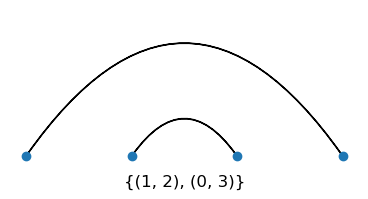 | 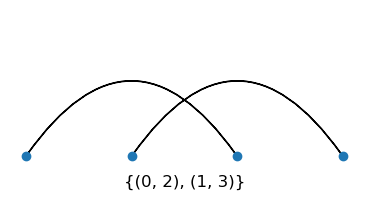 |
| :---: | :---: |
| 1 nesting, 0 crossings | 0 nestings, 1 crossing |


---
**[3.1] [10 marks]** Write a function `find_equivalent_matchings` that takes a matching and returns all matchings with the same pattern (including the original one).

Using this function, draw all matchings equivalent to $\{(0,7),(1,4),(2,3),(5,6)\}$.

You might find it helpful to generate all permutations of a list using `itertools.permutation` (imported above) as in the following code template.
```python
perms=permutations(list_of_items)
for p in perms:
    ...
    ...
```

In [18]:
# Type your code and comments here

---

Along with this Jupyter Notebook, you have been provided with a Python file called **"project.py"**, which you should **save in the same directory as this Jupyter notebook**.
This file contains a function `create_partial_matching`, which takes a student ID as an integer and creates a partial matching. (The output will look random, but will be unique to the provided student ID, i.e. no two students will have the same partial matching to work with.) This partial matching will have a few missing entries, indicated by an asterisk (as a string value). For example, a partial matching might be

```[(0,5),(1,'*'),('*',3)]```.

In this example, it is clear that the numbers $2$ and $4$ are missing, so one could try to fill the gaps as `[(0,5),(1,2),(4,3)]` or `[(0,5),(1,4),(2,3)]`. Only the latter choice is a valid matching, as $4>3$ violates the convention that the end of an arc has to be to the right of the start.

**[3.2] [5 marks]** Execute the following code cell to create your matching. You **must** replace the number "123456789" with your 9-digit student ID number. 

*Important note.* This question essentially gives you 5 free marks for typing your student ID correctly. If you do not do this correctly, you will score zero for this part, and if you instead use another student's ID, then your submission will be reviewed for plagiarism.

In [19]:
from project import create_partial_matching

# Replace "123456789" in the following line with your 9-digit student ID number
my_partial_matching=create_partial_matching(123456789)
# Replace "123456789" in the previous line with your 9-digit student ID number

---
**[3.3] [10 marks]** For your personal partial matching, print out the following information:

- a list of the pairs with missing data;
- a list of all missing numbers;
- the *number* of ways the partial matching can be completed to a valid(!) matching (but *not* the completed matchings themselves).

**Note: Do not print out anything else.**

In [20]:
# Type your code and comments here